<a href="https://colab.research.google.com/github/Akshata1712/fmml_assignments/blob/main/FMML_M1L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1

In [ ]:
!pip -q install wikipedia nltk matplotlib plotly pandas

import re
import nltk
import wikipedia
import numpy as np
import unicodedata
import pandas as pd
import plotly.express as px
from nltk.util import ngrams
import matplotlib.pyplot as plt
from collections import Counter

  Preparing metadata (setup.py) ... done


# Part 1: Features of text

Computures can't understand text. They can only process numbers. So, the logical first step in any attempt to analyze text is to convert it into numbers. This process is called **feature extraction** or **vectorization**. In this lab, we will try some simple methods for feature extraction.

First, let us download a 2 documents from Wikipedia in two different languages, English and French. We will then extract features from the text in these documents.

In [ ]:
topic1 = "Giraffe"
topic2 = "Elephant"

wikipedia.set_lang("en")

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang("fr")

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like in English:

In [ ]:
eng2[:500]

'Elephants are the largest living land animals. Three living species are currently recognised: the African bush elephant (Loxodonta africana), the African forest elephant (L. cyclotis), and the Asian elephant (Elephas maximus). They are the only surviving members of the family Elephantidae and the order Proboscidea; extinct relatives include mammoths and mastodons. Distinctive features of elephants include a long proboscis called a trunk, tusks, large ear flaps, pillar-like legs, and tough but se'

This is what the text looks like in French:

In [ ]:
fr2[:500]

"Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd'hui à trois espèces réparties en deux genres distincts. L'éléphant de savane d'Afrique et l'éléphant de forêt d'Afrique, autrefois regroupés sous la même espèce d'« éléphant d'Afrique », appartiennent au genre Loxodonta, tandis que l'éléphant d'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les élép"

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
    text = text.lower()  # make it lowercase
    text = re.sub(
        r"[^a-z\s]", "", text
    )  # only keep characters in a-z range and whitespaces
    return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
eng2[:500]

'elephants are the largest living land animals three living species are currently recognised the african bush elephant loxodonta africana the african forest elephant l cyclotis and the asian elephant elephas maximus they are the only surviving members of the family elephantidae and the order proboscidea extinct relatives include mammoths and mastodons distinctive features of elephants include a long proboscis called a trunk tusks large ear flaps pillarlike legs and tough but sensitive grey skin t'

In [ ]:
fr2[:500]

'les lphants sont des mammifres proboscidiens de la famille des lphantids ils correspondent aujourdhui  trois espces rparties en deux genres distincts llphant de savane dafrique et llphant de fort dafrique autrefois regroups sous la mme espce d lphant dafrique  appartiennent au genre loxodonta tandis que llphant dasie anciennement appel  lphant indien  appartient au genre elephas ils se diffrencient par certaines caractristiques anatomiques les lphants dasie tant en gnral plus petits avec des ore'

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
def tuple2string(tup):
    # convert a tuple of characters to a string
    # ('t', 'h') - > 'th'
    st = ""
    for ii in tup:
        st = st + ii
    return st


def key2string(keys):
    # convert a tuple of tuples to a list of strings
    # [('t', 'h'), ('h', 'e')] -> ['th', 'he']
    # [('t')] - >['t']
    return [tuple2string(i) for i in keys]


def get_ngram_freq(ngram):
    # get the frequency of ngrams
    # sort the keys in alphabetic order
    keys = key2string(ngram.keys())
    values = list(ngram.values())

    combined = zip(keys, values)
    zipped_sorted = sorted(combined, key=lambda x: x[0])
    keys, values = map(list, zip(*zipped_sorted))
    return keys, values

Let us compare the histograms of English pages and French pages. Can you spot a difference?

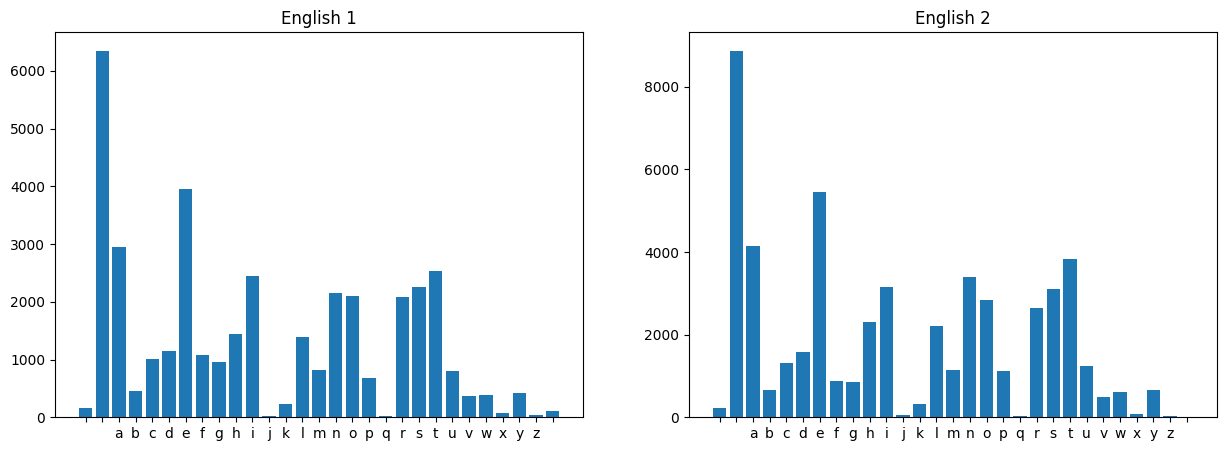

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_eng1 = Counter(ngrams(eng1, 1))
keys, values = get_ngram_freq(unigram_eng1)
axs[0].bar(keys, values)
axs[0].set_title("English 1")

unigram_eng2 = Counter(ngrams(eng2, 1))
keys, values = get_ngram_freq(unigram_eng2)
axs[1].bar(keys, values)
axs[1].set_title("English 2")
plt.show()

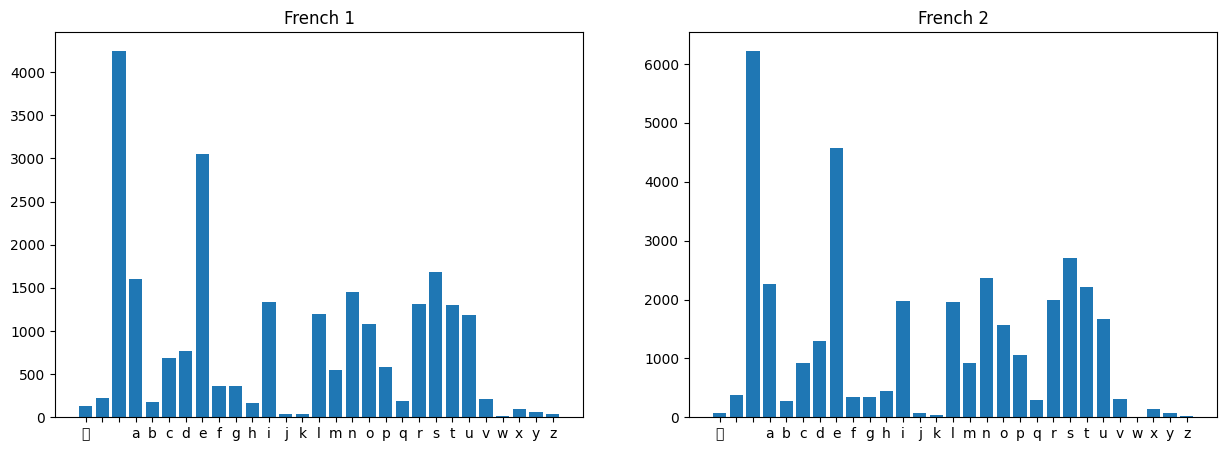

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_fr1 = Counter(ngrams(fr1, 1))
keys, values = get_ngram_freq(unigram_fr1)
axs[0].bar(keys, values)
axs[0].set_title("French 1")

unigram_fr2 = Counter(ngrams(fr2, 1))
keys, values = get_ngram_freq(unigram_fr2)
axs[1].bar(keys, values)
axs[1].set_title("French 2")
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

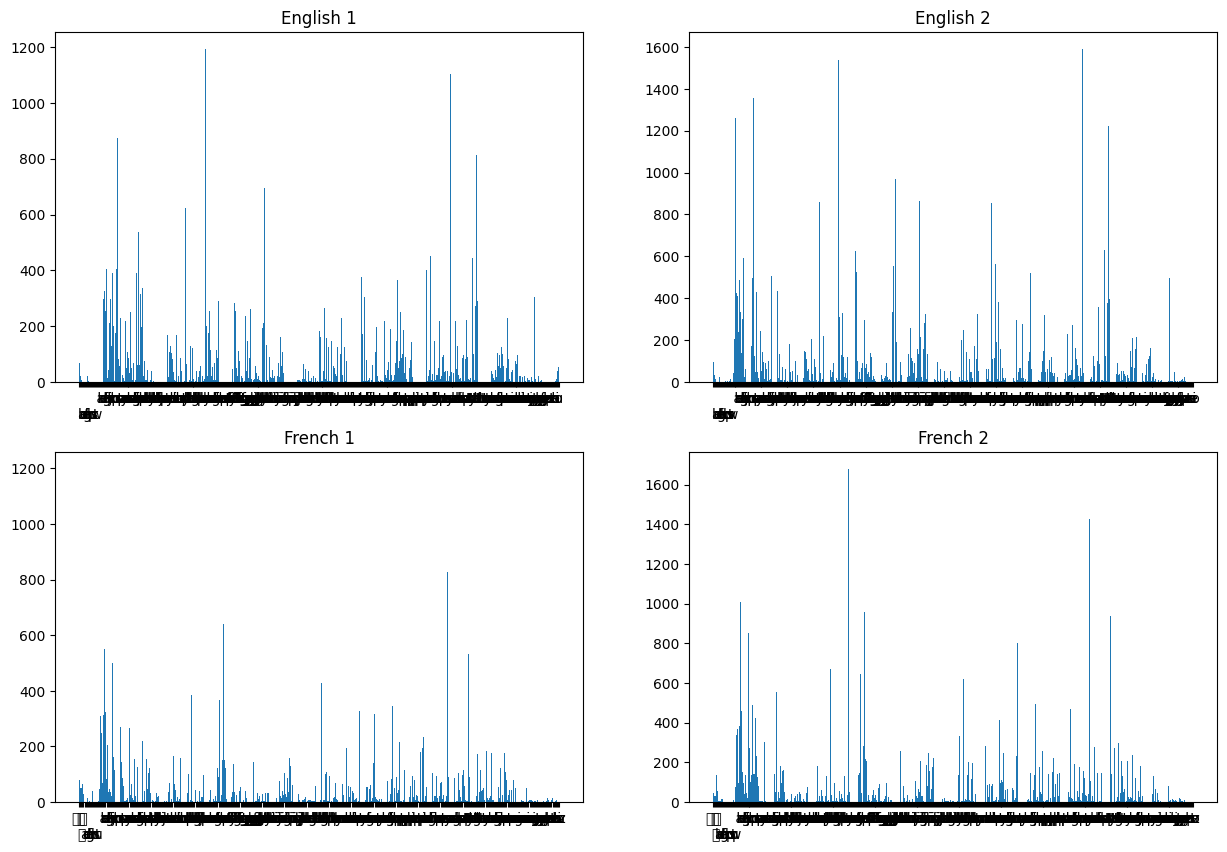

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_eng1 = Counter(ngrams(eng1, 2))
keys, values = get_ngram_freq(bigram_eng1)
axs[0, 0].bar(keys, values)
axs[0, 0].set_title("English 1")

bigram_eng2 = Counter(ngrams(eng2, 2))
keys, values = get_ngram_freq(bigram_eng2)
axs[0, 1].bar(keys, values)
axs[0, 1].set_title("English 2")

bigram_fr1 = Counter(ngrams(fr1, 2))
keys, values = get_ngram_freq(bigram_fr1)
axs[1, 0].bar(keys, values)
axs[1, 0].set_title("French 1")

bigram_fr2 = Counter(ngrams(fr2, 2))
keys, values = get_ngram_freq(bigram_fr2)
axs[1, 1].bar(keys, values)
axs[1, 1].set_title("French 2")
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def get_2D_ngram_freq(ngram):
    freq = np.zeros((26, 26))
    for ii in range(26):
        for jj in range(26):
            freq[ii, jj] = ngram[(chr(ord("a") + ii), chr(ord("a") + jj))]
    return freq

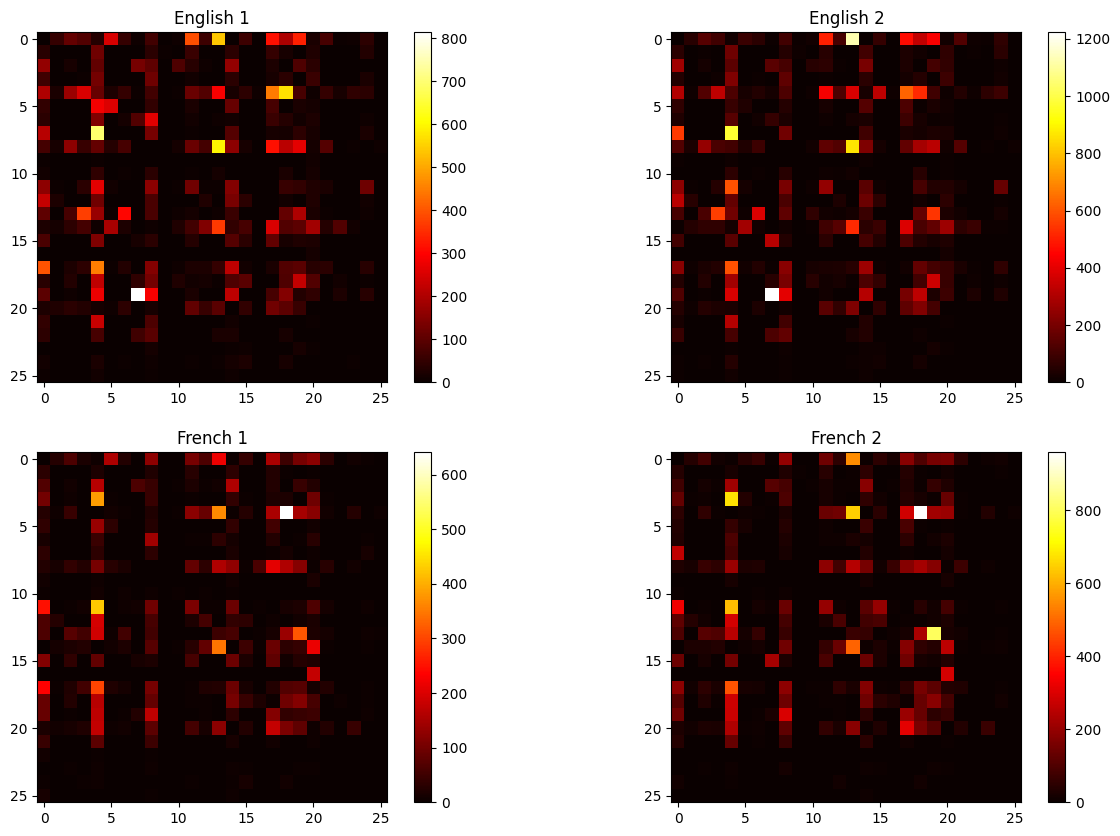

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_eng1_freq = get_2D_ngram_freq(bigram_eng1)
fig.colorbar(axs[0, 0].imshow(bigram_eng1_freq, cmap="hot"), ax=axs[0, 0])
axs[0, 0].set_title("English 1")

bigram_eng2_freq = get_2D_ngram_freq(bigram_eng2)
fig.colorbar(axs[0, 1].imshow(bigram_eng2_freq, cmap="hot"), ax=axs[0, 1])
axs[0, 1].set_title("English 2")

bigram_fr1_freq = get_2D_ngram_freq(bigram_fr1)
fig.colorbar(axs[1, 0].imshow(bigram_fr1_freq, cmap="hot"), ax=axs[1, 0])
axs[1, 0].set_title("French 1")

bigram_fr2_freq = get_2D_ngram_freq(bigram_fr2)
fig.colorbar(axs[1, 1].imshow(bigram_fr2_freq, cmap="hot"), ax=axs[1, 1])
axs[1, 1].set_title("French 2")
plt.show()

Let us look at the top 10 ngrams for each text.

In [ ]:
def ind2tup(ind):
    ind = int(ind)
    i = int(ind / 26)
    j = int(ind % 26)
    return (chr(ord("a") + i), chr(ord("a") + j))


def ShowTopN(bifreq, n=10):
    f = bifreq.flatten()
    arg = np.argsort(-f)
    for ii in range(n):
        print(f"{ind2tup(arg[ii])} : {f[arg[ii]]}")

In [ ]:
print("\nEnglish 1:")
ShowTopN(bigram_eng1_freq)

print("\nEnglish 2:")
ShowTopN(bigram_eng2_freq)

print("\nFrench 1:")
ShowTopN(bigram_fr1_freq)

print("\nFrench 2:")
ShowTopN(bigram_fr2_freq)


English 1:
('t', 'h') : 814.0
('h', 'e') : 694.0
('i', 'n') : 597.0
('e', 's') : 570.0
('a', 'n') : 539.0
('r', 'e') : 450.0
('e', 'r') : 446.0
('r', 'a') : 400.0
('a', 'l') : 392.0
('n', 'd') : 375.0

English 2:
('t', 'h') : 1223.0
('a', 'n') : 1125.0
('h', 'e') : 971.0
('i', 'n') : 864.0
('e', 'r') : 627.0
('r', 'e') : 596.0
('l', 'e') : 594.0
('n', 'd') : 562.0
('h', 'a') : 554.0
('n', 't') : 540.0

French 1:
('e', 's') : 641.0
('l', 'e') : 428.0
('d', 'e') : 385.0
('e', 'n') : 367.0
('o', 'n') : 346.0
('n', 't') : 317.0
('r', 'e') : 300.0
('l', 'a') : 249.0
('r', 'a') : 233.0
('a', 'n') : 220.0

French 2:
('e', 's') : 958.0
('n', 't') : 801.0
('d', 'e') : 671.0
('e', 'n') : 646.0
('l', 'e') : 619.0
('a', 'n') : 553.0
('o', 'n') : 493.0
('r', 'e') : 468.0
('l', 'a') : 333.0
('u', 'r') : 311.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

> Exercise: Try to extract trigrams and visualize the top 10 trigrams for each text.

# Part 2: Written numbers

We've seen how to extract features from text. Now let us see how to extract features from images. We will use the MNIST dataset which contains images of handwritten numbers. Each image is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

In [4]:
from keras.datasets import mnist

# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extract a subset of the data for our experiment:

In [5]:
no0 = train_X[train_y == 0, :, :]
no1 = train_X[train_y == 1, :, :]
no2 = train_X[train_y == 2, :, :]
no3 = train_X[train_y == 3, :, :]
no4 = train_X[train_y == 4, :, :]

Let us visualize a few images here:

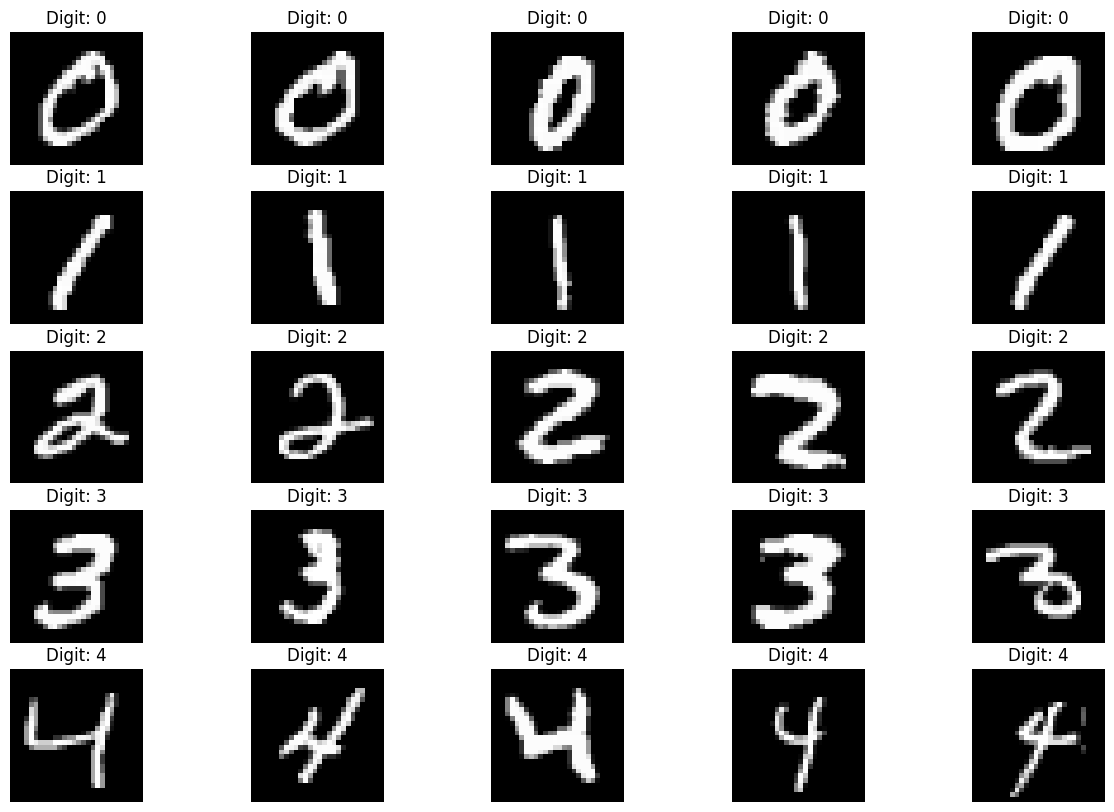

In [6]:

import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, 5, figsize=(15, 10))
for i, (no, label) in enumerate([(no0, 0), (no1, 1), (no2, 2), (no3, 3), (no4, 4)]):
    for j in range(5):
        axs[i, j].imshow(no[j, :, :], cmap='gray')
        axs[i, j].set_title(f'Digit: {label}')
        axs[i, j].axis('off')
plt.show()

Now, let us start with a simple feature: the sum of all pixels. Let's see how good this feature is.

In [8]:
import numpy as np
sum_features = {}
for digit in [0, 1, 2, 3, 4]:
    subset = train_X[train_y == digit]
    sum_features[digit] = np.sum(subset > 0, axis=(1, 2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

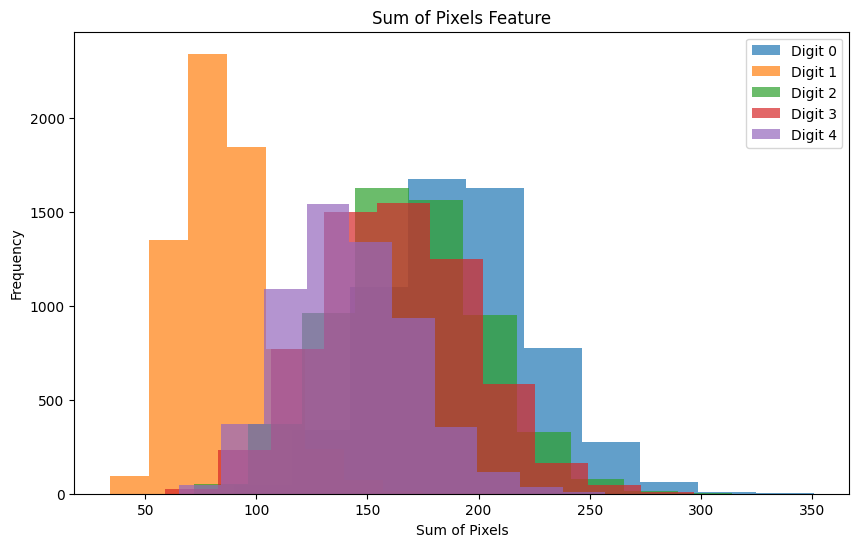

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
for digit in [0, 1, 2, 3, 4]:
    ax.hist(sum_features[digit], alpha=0.7, label=f'Digit {digit}')
ax.set_title('Sum of Pixels Feature')
ax.set_xlabel('Sum of Pixels')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [13]:
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = (
            img2[ii, :] + img2[ii - 1, :]
        )
    img2 = img2 > 0
    return img2


def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )
    hole = hull & ~(img > 0)
    return hole

Visualize a few. First row has the original zero number images and the second row has the hole pixels. Thrid row has original one number images and the last row has corresponding hole pixels which are non-existent, as expected.

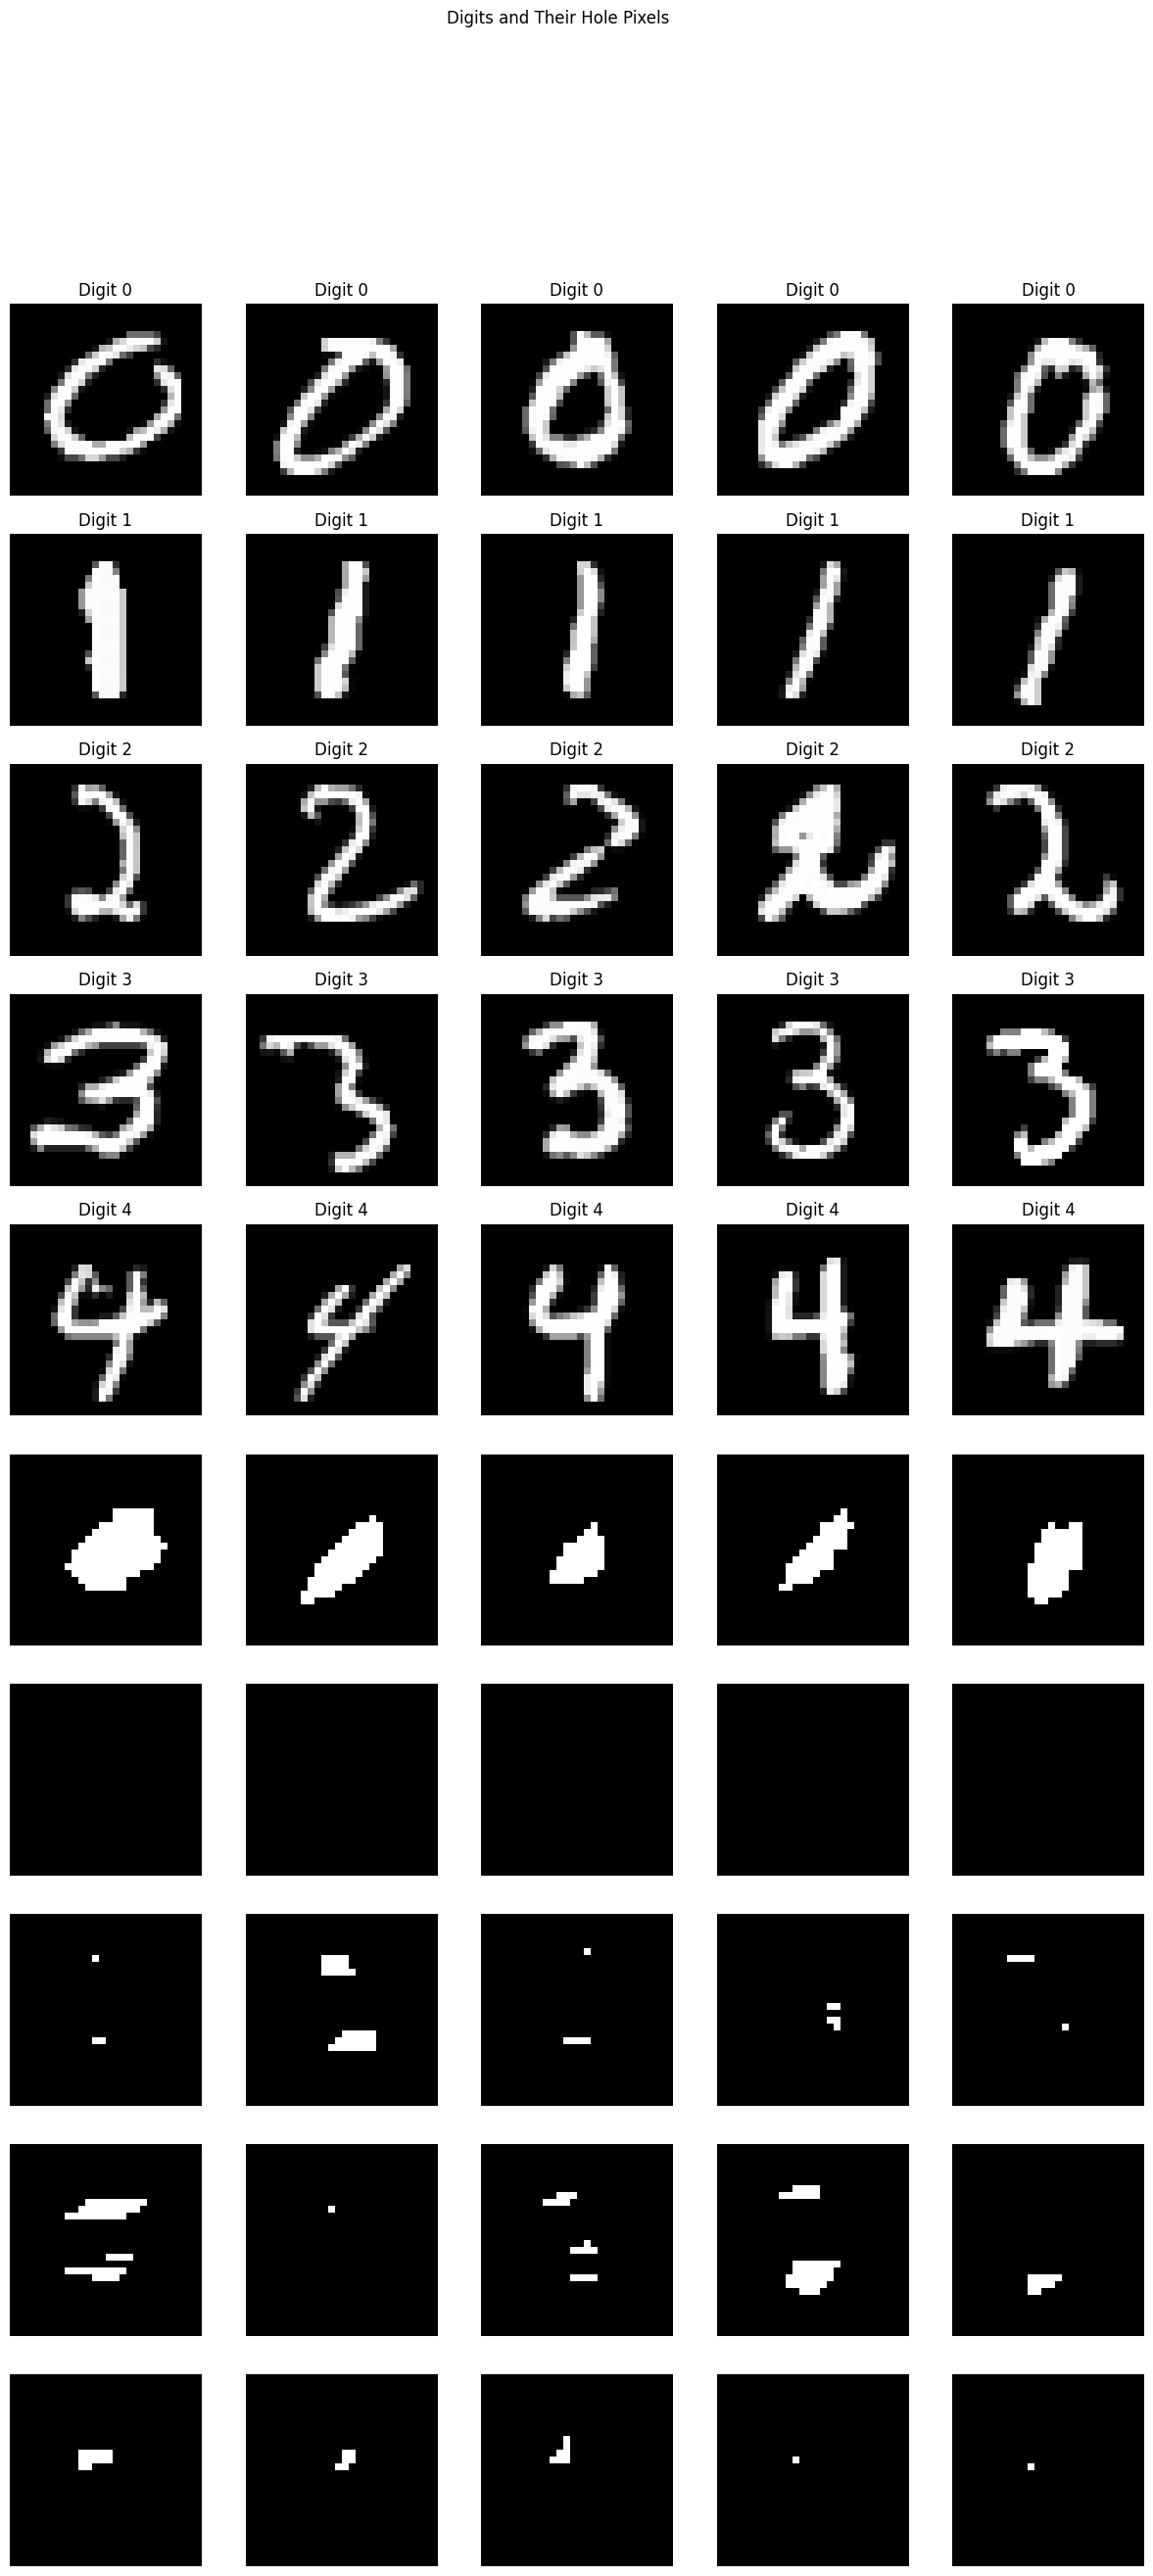

In [15]:
img_ids = {
    digit: np.random.choice(np.where(train_y == digit)[0], 5, replace=False)
    for digit in [0, 1, 2, 3, 4]
}

fig, axs = plt.subplots(10, 5, figsize=(15, 30))

for digit in [0, 1, 2, 3, 4]:
    for ii, idx in enumerate(img_ids[digit]):
        axs[digit, ii].imshow(train_X[idx, :, :], cmap='gray')
        axs[digit, ii].set_title(f'Digit {digit}')
        axs[digit, ii].axis('off')


        hole_img = getHolePixels(train_X[idx, :, :])
        axs[digit + 5, ii].imshow(hole_img, cmap='gray')
        axs[digit + 5, ii].axis('off')

fig.suptitle('Digits and Their Hole Pixels')
plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

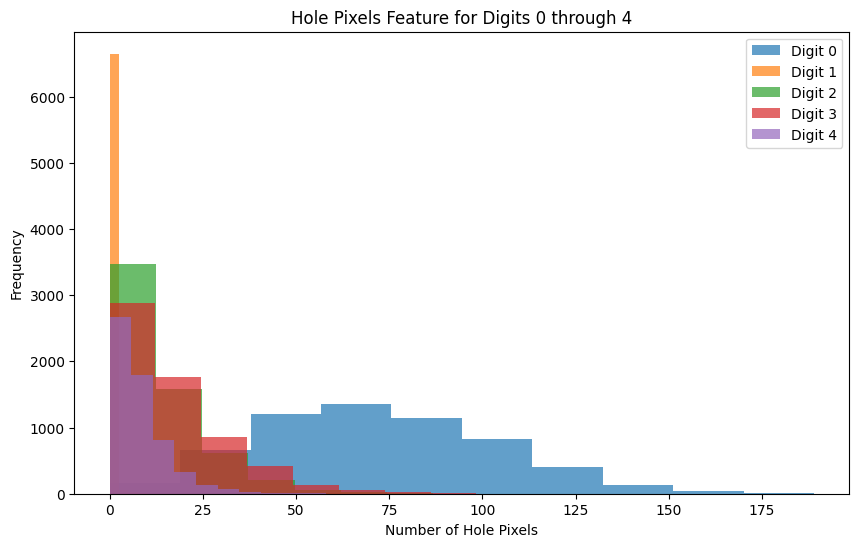

In [16]:

hole_features = {}
for digit in [0, 1, 2, 3, 4]:
    subset = train_X[train_y == digit]
    hole_features[digit] = np.array([getHolePixels(img).sum() for img in subset])


fig, ax = plt.subplots(figsize=(10, 6))
for digit in [0, 1, 2, 3, 4]:
    ax.hist(hole_features[digit], alpha=0.7, label=f'Digit {digit}')
ax.set_title('Hole Pixels Feature for Digits 0 through 4')
ax.set_xlabel('Number of Hole Pixels')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()


This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [17]:
def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )
    return hull

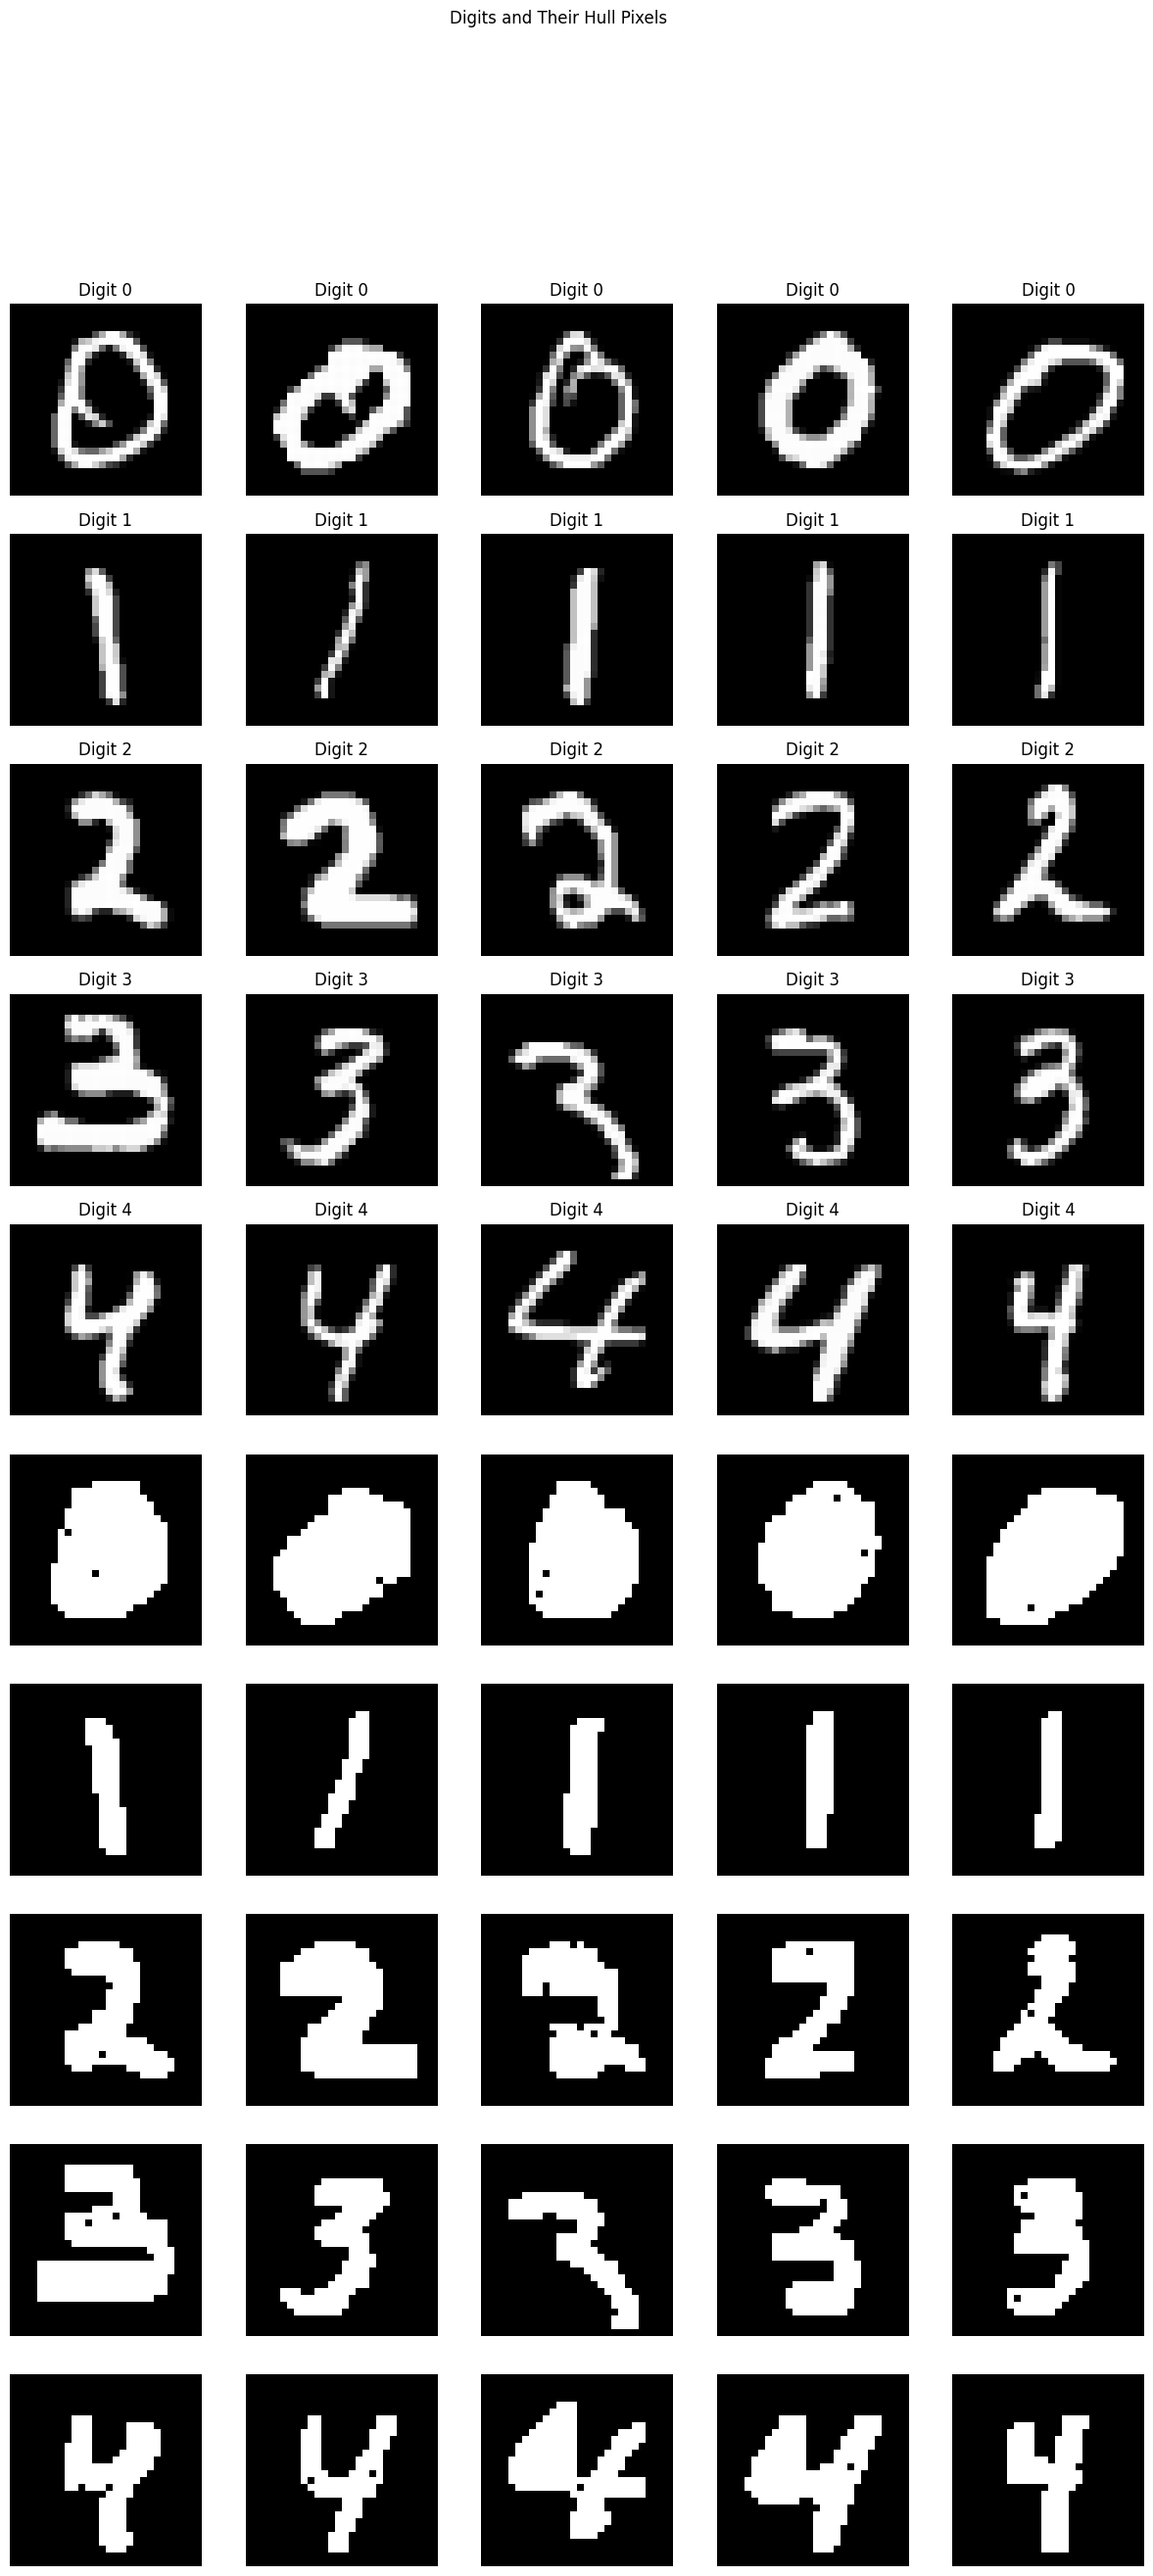

In [20]:

img_ids = {digit: np.random.choice(np.where(train_y == digit)[0], 5, replace=False)
           for digit in [0, 1, 2, 3, 4]}

fig, axs = plt.subplots(10, 5, figsize=(15, 30))


for digit in [0, 1, 2, 3, 4]:
    for ii, idx in enumerate(img_ids[digit]):

        axs[digit, ii].imshow(train_X[idx, :, :], cmap='gray')
        axs[digit, ii].set_title(f'Digit {digit}')
        axs[digit, ii].axis('off')


        hull_img = getHullPixels(train_X[idx, :, :])
        axs[digit + 5, ii].imshow(hull_img, cmap='gray')
        axs[digit + 5, ii].axis('off')

fig.suptitle('Digits and Their Hull Pixels')
plt.show()


Plotting the number of hull pixels versus the digit:

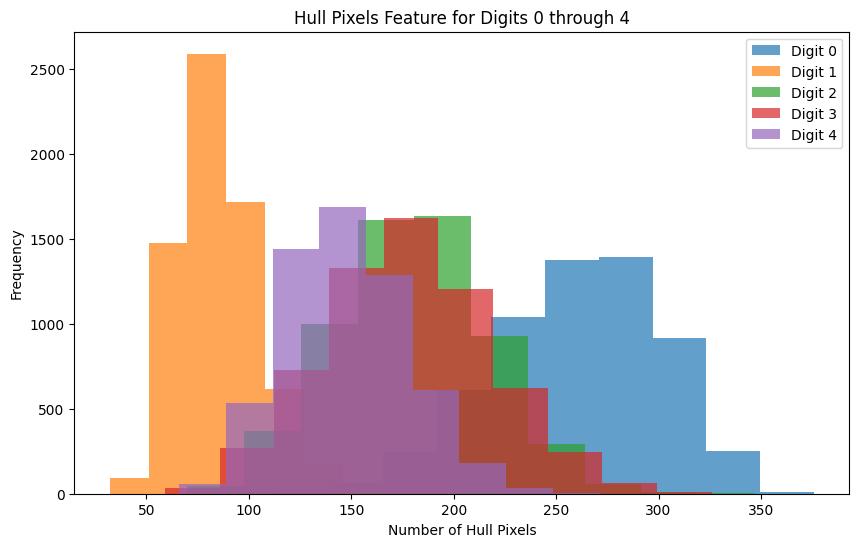

In [21]:
# Compute hull pixels for each digit
hull_features = {}
for digit in [0, 1, 2, 3, 4]:
    subset = train_X[train_y == digit]
    hull_features[digit] = np.array([getHullPixels(img).sum() for img in subset])

# Plot the hull pixels feature for each digit
fig, ax = plt.subplots(figsize=(10, 6))
for digit in [0, 1, 2, 3, 4]:
    ax.hist(hull_features[digit], alpha=0.7, label=f'Digit {digit}')
ax.set_title('Hull Pixels Feature for Digits 0 through 4')
ax.set_xlabel('Number of Hull Pixels')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()


Let us try one more feature, where we look at the number of boundary pixels in each image.

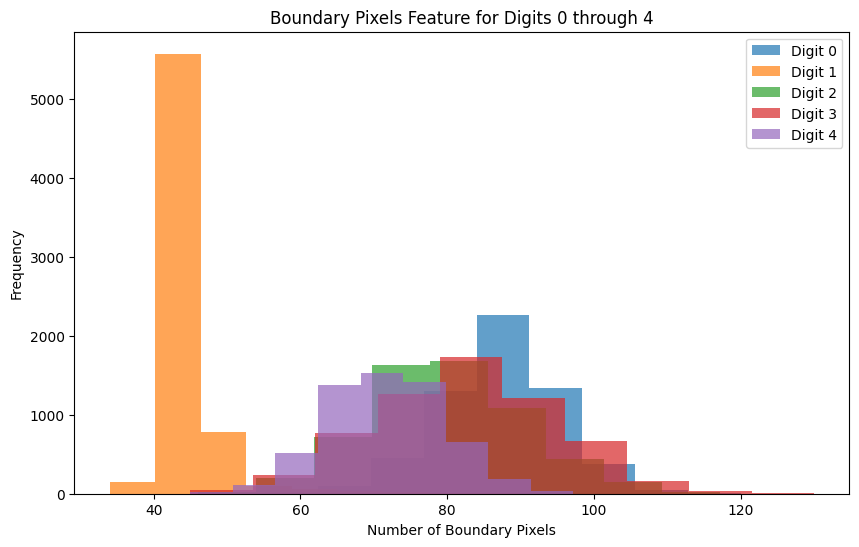

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


(train_X, train_y), (test_X, test_y) = mnist.load_data()


train_X = train_X[train_y < 5]
train_y = train_y[train_y < 5]

def minus(a, b):
    return a & ~b

def getBoundaryPixels(img):
    img = img.copy() > 0  # Binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary


boundary_features = {}
for digit in [0, 1, 2, 3, 4]:
    subset = train_X[train_y == digit]
    boundary_features[digit] = np.array([getBoundaryPixels(img).sum() for img in subset])


fig, ax = plt.subplots(figsize=(10, 6))
for digit in [0, 1, 2, 3, 4]:
    ax.hist(boundary_features[digit], alpha=0.7, label=f'Digit {digit}')
ax.set_title('Boundary Pixels Feature for Digits 0 through 4')
ax.set_xlabel('Number of Boundary Pixels')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()



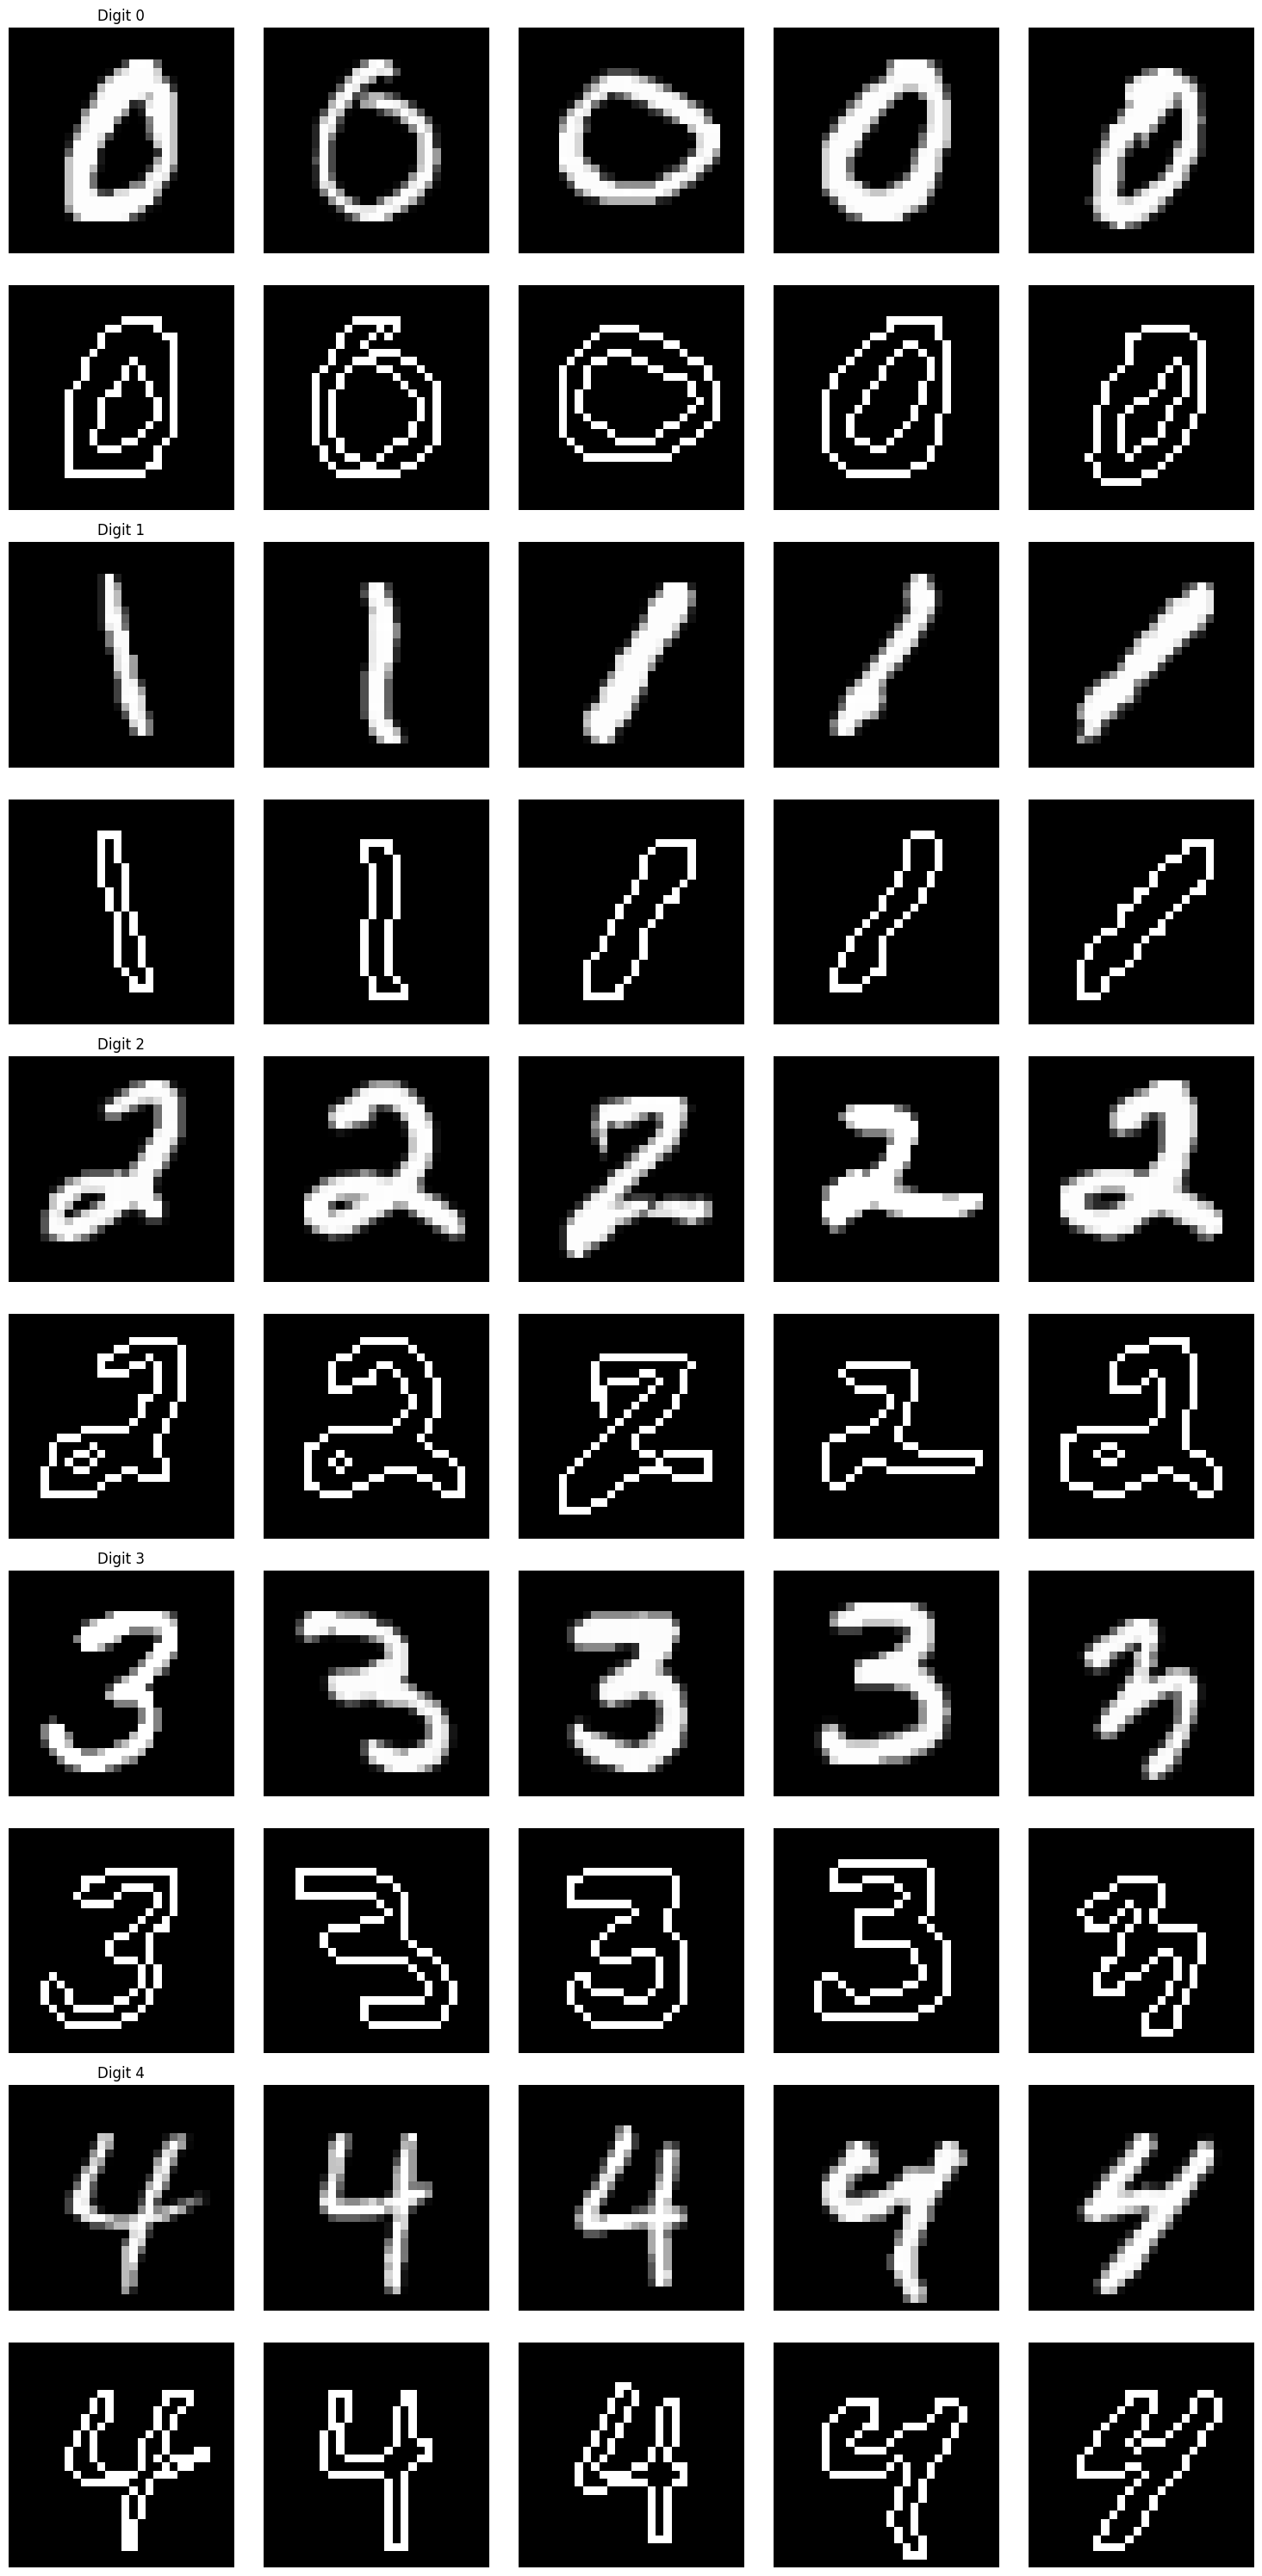

In [27]:
img_ids = {
    0: [12, 236, 345, 435, 512],
    1: [15, 248, 367, 431, 519],
    2: [22, 259, 378, 442, 523],
    3: [30, 267, 384, 453, 531],
    4: [35, 274, 391, 460, 542]
}

fig, axs = plt.subplots(10, 5, figsize=(15, 30))

for digit in range(5):
    for ii, idx in enumerate(img_ids[digit]):
        axs[digit * 2, ii].imshow(train_X[train_y == digit][idx], cmap='gray') # Changed indexing to access correct row
        if ii == 0:
            axs[digit * 2, ii].set_title(f'Digit {digit}')
        if ii == 0:
            axs[digit * 2, ii].set_ylabel('Original')
        axs[digit * 2 + 1, ii].imshow(getBoundaryPixels(train_X[train_y == digit][idx]), cmap='gray') # Changed indexing to access correct row
        if ii == 0:
            axs[digit * 2 + 1, ii].set_ylabel('Boundary')
        axs[digit * 2, ii].axis('off') # Changed indexing to access correct row
        axs[digit * 2 + 1, ii].axis('off') # Changed indexing to access correct row

plt.tight_layout()
plt.show()


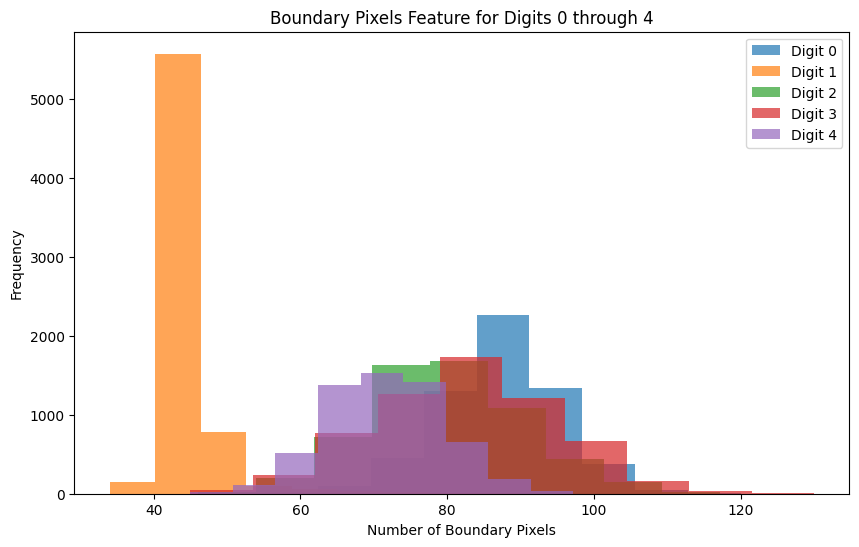

In [28]:
# Initialize a dictionary to store boundary features for each digit
boundary_features = {}
for digit in [0, 1, 2, 3, 4]:
    subset = train_X[train_y == digit]
    boundary_features[digit] = np.array([getBoundaryPixels(img).sum() for img in subset])

# Plot the boundary pixels feature for each digit
fig, ax = plt.subplots(figsize=(10, 6))
for digit in [0, 1, 2, 3, 4]:
    ax.hist(boundary_features[digit], alpha=0.7, label=f'Digit {digit}')
ax.set_title('Boundary Pixels Feature for Digits 0 through 4')
ax.set_xlabel('Number of Boundary Pixels')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()


What will happen if we plot two features together?

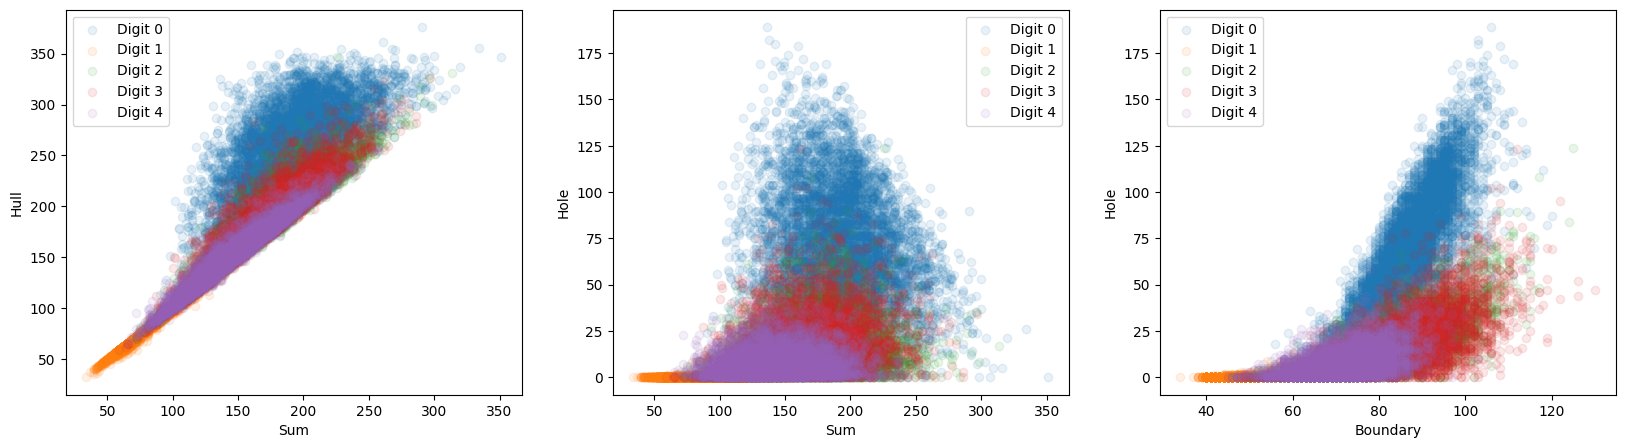

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load the MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Helper functions (assuming you've already defined cumArray, getHolePixels, getHullPixels, getBoundaryPixels)

# Compute features for digits 0 to 4
features = {}
for digit in range(5):
    subset = train_X[train_y == digit]
    features[digit] = {
        'sum': np.sum(subset > 0, axis=(1, 2)),
        'hull': np.array([getHullPixels(img).sum() for img in subset]),
        'hole': np.array([getHolePixels(img).sum() for img in subset]),
        'boundary': np.array([getBoundaryPixels(img).sum() for img in subset]),
    }

# Visualization
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Scatter plot: Sum vs Hull
for digit in range(5):
    axs[0].scatter(features[digit]['sum'], features[digit]['hull'], alpha=0.1, label=f'Digit {digit}')
axs[0].set_xlabel("Sum")
axs[0].set_ylabel("Hull")
axs[0].legend()

# Scatter plot: Sum vs Hole
for digit in range(5):
    axs[1].scatter(features[digit]['sum'], features[digit]['hole'], alpha=0.1, label=f'Digit {digit}')
axs[1].set_xlabel("Sum")
axs[1].set_ylabel("Hole")
axs[1].legend()

# Scatter plot: Boundary vs Hole
for digit in range(5):
    axs[2].scatter(features[digit]['boundary'], features[digit]['hole'], alpha=0.1, label=f'Digit {digit}')
axs[2].set_xlabel("Boundary")
axs[2].set_ylabel("Hole")
axs[2].legend()

plt.show()


Now let us try plotting 3 features together.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from keras.datasets import mnist

# Load the MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Define the helper functions
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2

def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    hole = hull & ~(img > 0)
    return hole

def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    return hull

def minus(a, b):
    return a & ~b

def getBoundaryPixels(img):
    img = img.copy() > 0
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
    return boundary

# Initialize lists to store features for all digits
holes, sums, boundaries, labels = [], [], [], []

# Process digits 0 through 4
for digit in range(5):
    subset = train_X[train_y == digit]
    hole = np.array([getHolePixels(img).sum() for img in subset])
    boundary = np.array([getBoundaryPixels(img).sum() for img in subset])
    sum_ = np.sum(subset > 0, axis=(1, 2))

    # Append features and labels
    holes.extend(hole)
    sums.extend(sum_)
    boundaries.extend(boundary)
    labels.extend([f"class {digit}"] * len(hole))

# Create a DataFrame
df = pd.DataFrame({
    "Hole": holes,
    "Sum": sums,
    "Boundary": boundaries,
    "Class": labels
})

# 3D Scatter Plot
fig = px.scatter_3d(df, x="Hole", y="Sum", z="Boundary", color="Class", opacity=0.1)
fig.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Feel free to explore the above graph with your mouse.


We extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

> Exercise: Remember we took a subset of only the first two numbers in MNIST? Include 5 or more numbers now and try to visualise which feature works best when multiple numbers are involved. Brownie points if you use all numbers :)

If you were to choose one feature that works best for a wide range of digits, Sum might be the most versatile and reliable. However, combining features - like sum plus boundary - could provide the best overall distinction between digits.